In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.maf import normalize_for_radar, radar
import pandas as pd


In [2]:
data = pd.read_hdf('combined_maf_dataframe.hdf')

In [3]:
data = data.set_index('runName')

In [4]:
data.columns


Index(['version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y',
       'SNNSNMetric_nSN_Total detected',
       'MicrolensingMetric_detect_Fraction detected of total (mean)',
       'KNePopMetric_all__multi_color_detect_Fraction detected of total (mean)',
       'GalaxyCountsMetric_extended_N Galaxies (all)',
       'TDEsPopMetric__some_color_Fraction detected of total (mean)',
       'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)',
       'WeakLensingNvisits_Median', 'ExgalM5_with_cuts_3x2ptFoM'],
      dtype='object')

In [5]:
cols = ['parallax_best18k', 'properMotion_best18k', 'fO_fONv MedianNvis',
        'SNNSNMetric_nSN_Total detected',
        'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)',
        'WeakLensingNvisits_Median',
        'ExgalM5_with_cuts_3x2ptFoM',
        'MicrolensingMetric_detect_Fraction detected of total (mean)', 
        'GalaxyCountsMetric_extended_N Galaxies (all)']#,
#        'Nstars_no_crowding_Total N Stars, no crowding',
#        'NEO bright', 'NEO faint', 'TNO']

linear_cols = []

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
           'median_coadd_r', 'median_coadd_i',
            'median_coadd_z', 'median_coadd_y']


name_mapper = {'runName': 'runName', 'parallax_best18k': 'Parallax', 'properMotion_best18k': 'Proper Motion',
       'fO_fONv MedianNvis': 'fO N', 'SNNSNMetric_nSN_Total detected': 'SNeIa',
               'MicrolensingMetric_detect_Fraction detected of total (mean)': 'Micro L',
       'Slow Microlensing_Mean': 'Slow Micro L',
        'TDEsPopMetric__some_color_Fraction detected of total (mean)': 'TDE',
               'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)':'TDE',
               'WeakLensingNvisits_Median': 'WL',
               'ExgalM5_with_cuts_3x2ptFoM': '3x2FoM',
       'GalaxyCountsMetric_extended_N Galaxies (all)': 'N Gals',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars',
       '3 pairs in 15 nights detection loss NEO H=16.0': 'NEO, bright',
               '3 pairs in 30 nights detection loss NEO H=22.0':'NEO, faint',
        '3 pairs in 15 nights detection loss TNO H=6.0':' TNO',
              'NEO bright': 'NEO, bright', 'NEO faint': 'NEO, faint',
              'TNO': 'TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

In [6]:
data

,version,parallax_best18k,properMotion_best18k,fO_fONv MedianNvis,fO_fOArea,median_coadd_u,median_coadd_g,median_coadd_r,median_coadd_i,median_coadd_z,median_coadd_y,SNNSNMetric_nSN_Total detected,MicrolensingMetric_detect_Fraction detected of total (mean),KNePopMetric_all__multi_color_detect_Fraction detected of total (mean),GalaxyCountsMetric_extended_N Galaxies (all),TDEsPopMetric__some_color_Fraction detected of total (mean),TDEsPopMetric__some_color_pu_Fraction detected of total (mean),WeakLensingNvisits_Median,ExgalM5_with_cuts_3x2ptFoM
runName,,,,,,,,,,,,,,,,,,,
baseline,2.1,0.786108,0.186120,831.0,10751.351595,25.694515,26.751817,26.839127,26.289475,25.591354,24.786582,46803.461452,0.0794,0.04324,1.325153e+10,0.0556,0.0090,441.0,39.756504
clouds_baseline_cloudso0_ns2,2.1,0.794188,0.185683,836.0,11909.576826,25.682173,26.744279,26.828978,26.274234,25.567579,24.780598,117101.092798,0.0776,0.04258,9.590893e+09,0.0564,0.0073,444.0,39.463016
clouds_baseline_cloudso0_ns3,2.1,0.789988,0.188387,838.0,12314.955656,25.666368,26.728955,26.802318,26.255725,25.552643,24.762868,112272.596496,0.0795,0.04048,1.053339e+10,0.0549,0.0085,445.0,39.152267
clouds_baseline_cloudso10_ns2,2.1,0.780678,0.185039,883.0,18253.797490,25.686632,26.747557,26.839666,26.299847,25.596570,24.797870,121781.293063,0.0840,0.04544,1.323051e+10,0.0575,0.0086,469.0,39.822272
clouds_baseline_cloudso10_ns3,2.1,0.772209,0.187565,885.0,18202.600577,25.654048,26.722897,26.827759,26.285158,25.575533,24.784413,118654.436964,0.0827,0.04304,3.405491e+09,0.0538,0.0098,470.0,39.733323
clouds_baseline_cloudso11_ns2,2.1,0.772227,0.182540,884.0,18232.815149,25.666067,26.744079,26.840915,26.300650,25.593133,24.796754,121812.081123,0.0852,0.04498,9.543811e+09,0.0592,0.0085,469.0,39.738939
clouds_baseline_cloudso11_ns3,2.1,0.767257,0.185131,886.0,18227.779387,25.646926,26.709993,26.818575,26.285920,25.576768,24.781663,119170.895305,0.0795,0.04376,1.242968e+10,0.0551,0.0083,470.0,39.702714
clouds_baseline_cloudso1_ns2,2.1,0.789839,0.186966,832.0,11059.372363,25.684403,26.765274,26.847107,26.289712,25.572937,24.783044,118158.371508,0.0750,0.04480,3.467709e+09,0.0524,0.0084,443.0,39.827967
clouds_baseline_cloudso1_ns3,2.1,0.787642,0.189350,834.0,11499.162233,25.662858,26.740708,26.820175,26.272263,25.553997,24.779074,114283.764841,0.0785,0.04096,7.792496e+09,0.0523,0.0076,444.0,39.708275


In [7]:


data_normed = normalize_for_radar(data[cols], mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='clouds_baseline_cloudso0_ns2')
data_normed = data_normed.rename(columns=name_mapper)

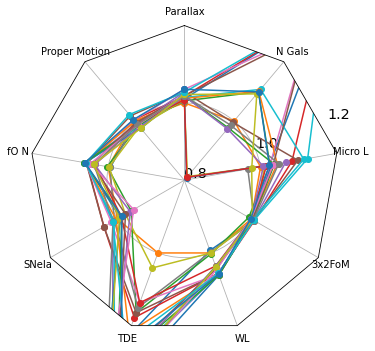

In [8]:
fig, ax = radar(data_normed, legend=False, rgrids=[0.8, 1.0, 1.2])
fig.tight_layout()
#fig.savefig('radar_plots/even_filt_radar.pdf')


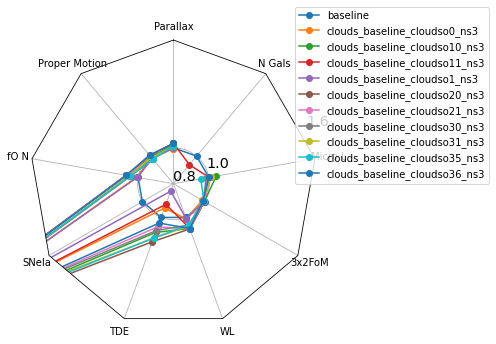

In [9]:
runs = ['baseline'] + [name for name in data.index if 'ns3' in name]

data_normed = normalize_for_radar(data[cols].loc[runs], mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                                  norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.6])
fig.tight_layout()


In [10]:
data_normed
for col in data_normed.columns:
    print(col, np.std(data_normed[col]))

Parallax 0.009534255436359081
Proper Motion 0.009891256549835229
fO N 0.026293594263556336
SNeIa 0.4230905320945663
TDE 0.0908192597696526
WL 0.02554677346952425
3x2FoM 0.0044556437334852626
Micro L 0.0200650784454359
N Gals 0.23105644207592943


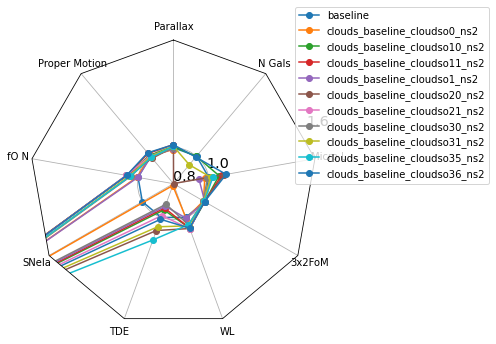

In [11]:
runs =['baseline'] + [name for name in data.index if 'ns2' in name]

data_normed = normalize_for_radar(data[cols].loc[runs], mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                                  norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.6])
fig.tight_layout()



In [12]:

for col in data_normed.columns:
    print(col, np.std(data_normed[col]))

Parallax 0.008257144236071587
Proper Motion 0.011273679111071343
fO N 0.025893192237561407
SNeIa 0.4407831135109485
TDE 0.08304971632765444
WL 0.02538825696696045
3x2FoM 0.0032473136401178285
Micro L 0.04612915560956814
N Gals 0.20981432612781284
